This notebook attempts to use the varimax solution from Kaiser (1958) page 194. Equation (11).

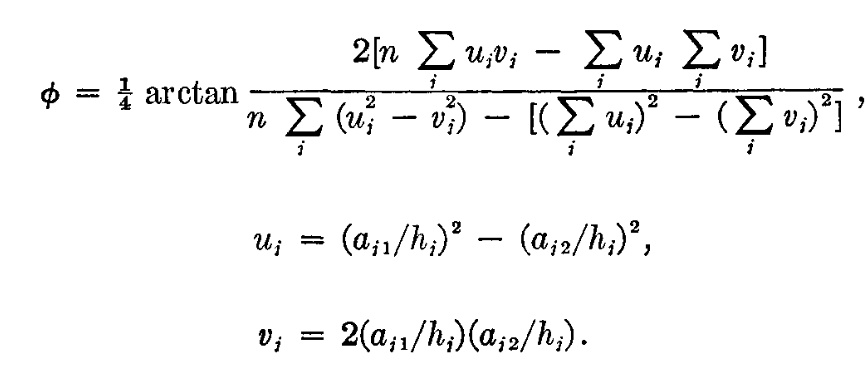

In [3]:
import numpy as np

In [4]:

n = 88

a = np.array([[0.628, 0.372],
              [0.696,  0.313],
              [0.899,  -0.05 ],
              [0.779,  -0.201],
              [0.728,  -0.2  ]])

In [5]:
h_i = np.sum(a ** 2, axis=1) ** 0.5
u_i = (a[:,0] / h_i) ** 2 - (a[:,1] / h_i) ** 2
v_i = 2 * (a[:,0] / h_i) * (a[:,1] / h_i)

h_i, u_i, v_i

(array([0.72990958, 0.76314153, 0.90038936, 0.80451352, 0.75497285]),
 array([0.48050934, 0.66355933, 0.9938325 , 0.87515952, 0.85964518]),
 array([ 0.87698961,  0.74812366, -0.11089169, -0.48383449, -0.51089153]))

In [6]:
nominator = 2 * (n * np.sum(u_i * v_i) - np.sum(u_i) * np.sum(v_i))
denominator = n * np.sum(u_i ** 2 - v_i ** 2) - (np.sum(u_i) ** 2 - np.sum(v_i) ** 2)
phi = 1/4 * np.arctan(nominator / denominator)
phi

-0.03335492676811064

In [10]:
def _ortho_rotation(components, method="varimax", tol=1e-6, max_iter=100):
    """Return rotated components."""
    nrow, ncol = components.shape
    rotation_matrix = np.eye(ncol)
    var = 0

    for _ in range(max_iter):
        comp_rot = np.dot(components, rotation_matrix)
        if method == "varimax":
            tmp = comp_rot * np.transpose((comp_rot**2).sum(axis=0) / nrow)
        elif method == "quartimax":
            tmp = 0
        u, s, v = np.linalg.svd(np.dot(components.T, comp_rot**3 - tmp))
        rotation_matrix = np.dot(u, v)
        var_new = np.sum(s)
        if var != 0 and var_new < var * (1 + tol):
            break
        var = var_new

    return np.dot(components, rotation_matrix).T

In [12]:
a = np.array([[0.628, 0.372],
              [0.696,  0.313],
              [0.899,  -0.05 ],
              [0.779,  -0.201],
              [0.728,  -0.2  ]])

_ortho_rotation(components=a.T)

array([[-1.16158121e-17, -4.06635542e-17],
       [ 1.51473485e-16,  8.39249873e-16],
       [ 1.68032076e+00,  5.58488324e-02],
       [-1.86587536e-02, -5.62258755e-01],
       [-9.20432571e-17, -9.40232465e-18]])

In [20]:
from sklearn.decomposition import FactorAnalysis
from utils import open_closed_data
X = open_closed_data()
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
FactorAnalysis(n_components=2, 
               svd_method="lapack", # Max accuracy
               rotation="varimax", # Obviously
               ).fit(X_norm).components_.T


array([[-0.31497345, -0.65536412],
       [-0.3996211 , -0.65337016],
       [-0.76895652, -0.46258134],
       [-0.76177302, -0.268443  ],
       [-0.71685585, -0.24043076]])